In [1]:
import pyvista as pv

In [2]:
mesh = pv.read('test1.vtk')
stl = pv.read('clite1_cm+TCP_C-Model+UpdatedTopShield.stl')

In [7]:
import numpy as np

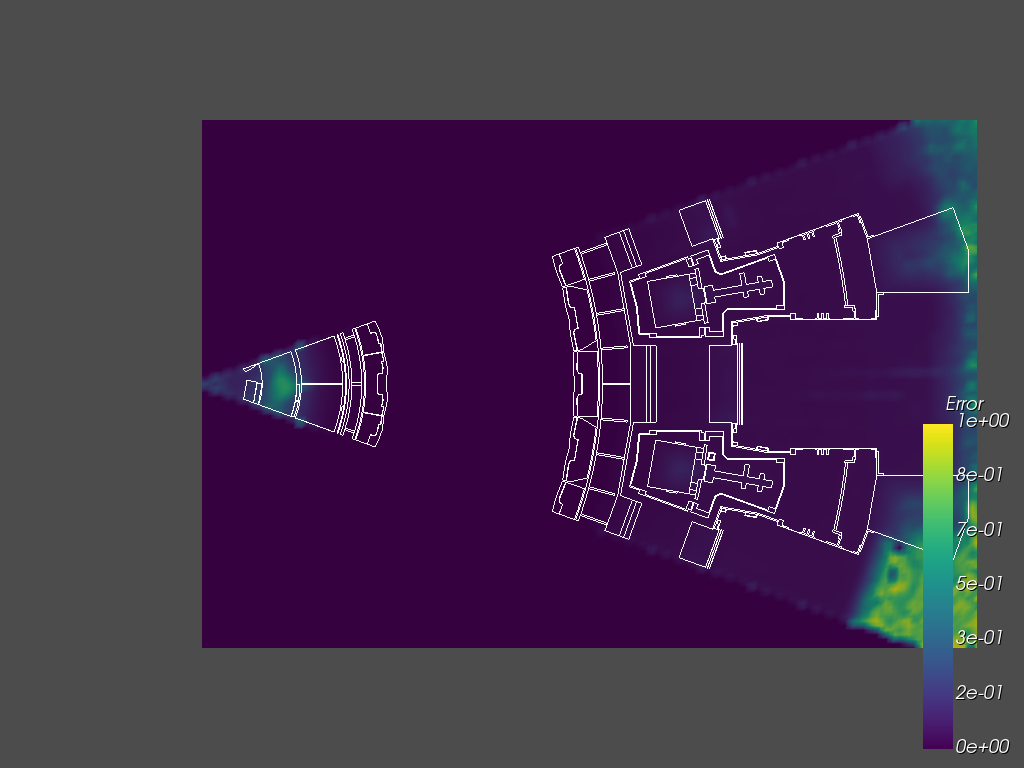

In [11]:
sargs = dict(
    title_font_size=18,
    label_font_size=18,
    shadow=True,
    n_labels=7,
    italic=True,
    fmt="%.e",
    font_family="arial",
    vertical=True,
    loc='left')

plotter = pv.Plotter()
to_plot = mesh.slice_along_axis(5, axis='z')
idx = 2
stl_slice = stl.slice(normal='z', origin=to_plot[idx].center)
plotter.add_mesh(to_plot[idx], scalars = 'Error', scalar_bar_args=sargs)
plotter.add_mesh(stl_slice)

plotter.camera_position = 'xy'
plotter.reset_camera(bounds = np.array(to_plot[idx].bounds)*0.8)
plotter.show(jupyter_backend='static')

# mesh.plot(jupyter_backend='static')

In [5]:
to_plot = mesh.slice_along_axis(5, axis='z')
slicing1 = to_plot[0]
slicing1.center

[850.0, 0.0, -1280.0]

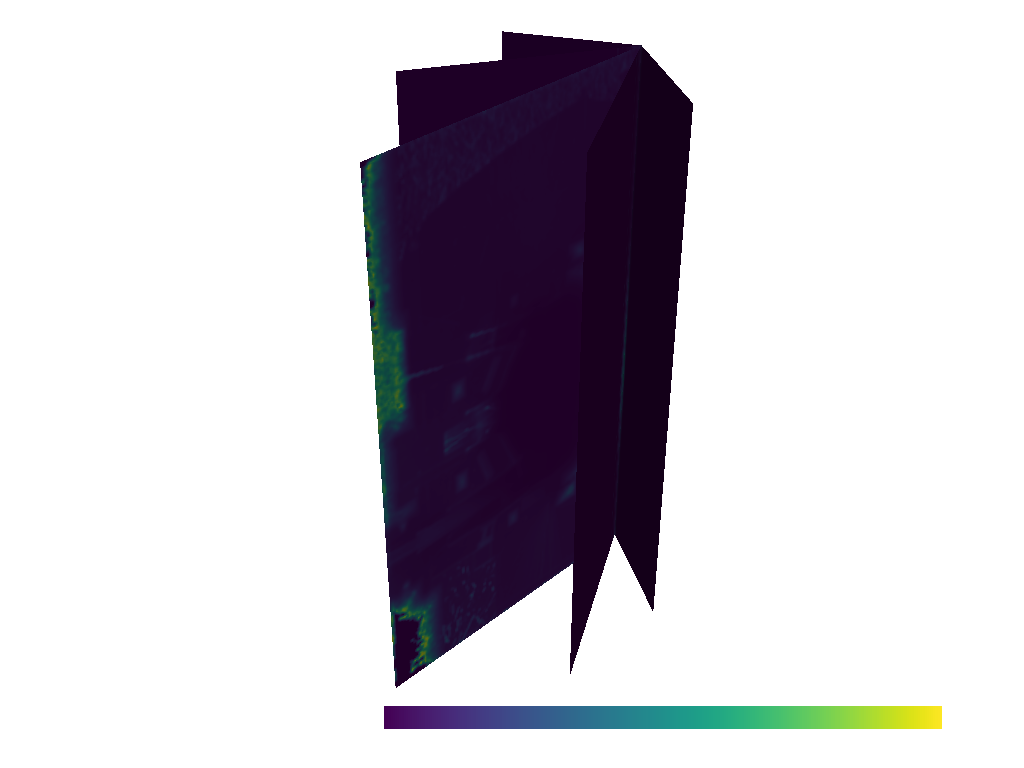

In [6]:
import numpy as np

# ranges = np.array(mesh.bounds).reshape(-1, 2).ptp(axis=1)
point = np.array([0, 0, 0])# np.array(mesh.center)


increment = np.pi / 6.0
# use a container to hold all the slices
slices = pv.MultiBlock()  # treat like a dictionary/list
for theta in np.arange(0, np.pi, increment):
    normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi / 2.0)
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = mesh.slice(origin=point, normal=normal)

p = pv.Plotter()
p.set_background('white')
camera_position = 'xy'
p.add_mesh(slices, scalars= 'Error')
p.show(jupyter_backend='static')


In [1]:
from f4enix.output.plotter import Atlas
import pyvista as pv

mesh = pv.read('test1.vtk')
stl = pv.read('clite1_cm+TCP_C-Model+UpdatedTopShield.stl')

atlas = Atlas(mesh, stl=stl)

slices = atlas.slice_toroidal(10, min_max_theta=(60, 120))
outpath = 'tmp'
atlas.plot_slices(slices, 'Error', outpath,
                  log_scale=False, min_max=[0, 1], n_colors=10)

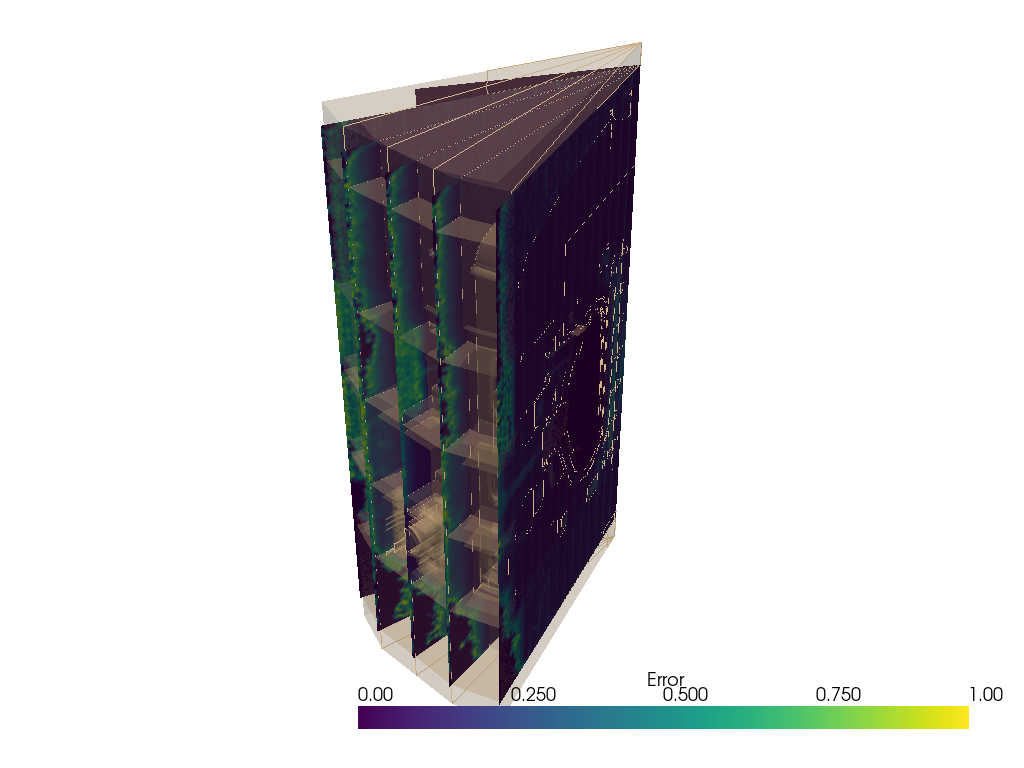

In [5]:
mesh_slices, stl_slices = atlas.slice_toroidal(10,
                                               min_max_theta=(60, 120)
                                               )


p = pv.Plotter()
# p.add_mesh(mesh_slices[1], scalars='Error')
# p.add_mesh(mesh, opacity=0.1)
# p.add_bounding_box()
for mesh_slice, stl_slice in zip(mesh_slices, stl_slices):
    p.add_mesh(mesh_slice, scalars= 'Error')
    p.add_mesh(stl_slice)

p.add_mesh(stl, opacity=0.2)

p.show(jupyter_backend='static')


In [3]:
outpath = 'tmp'
atlas.plot_slices(mesh_slices, 'Error', outpath, stl_slices=stl_slices,
                  log_scale=False, min_max=[0, 1], n_colors=10)


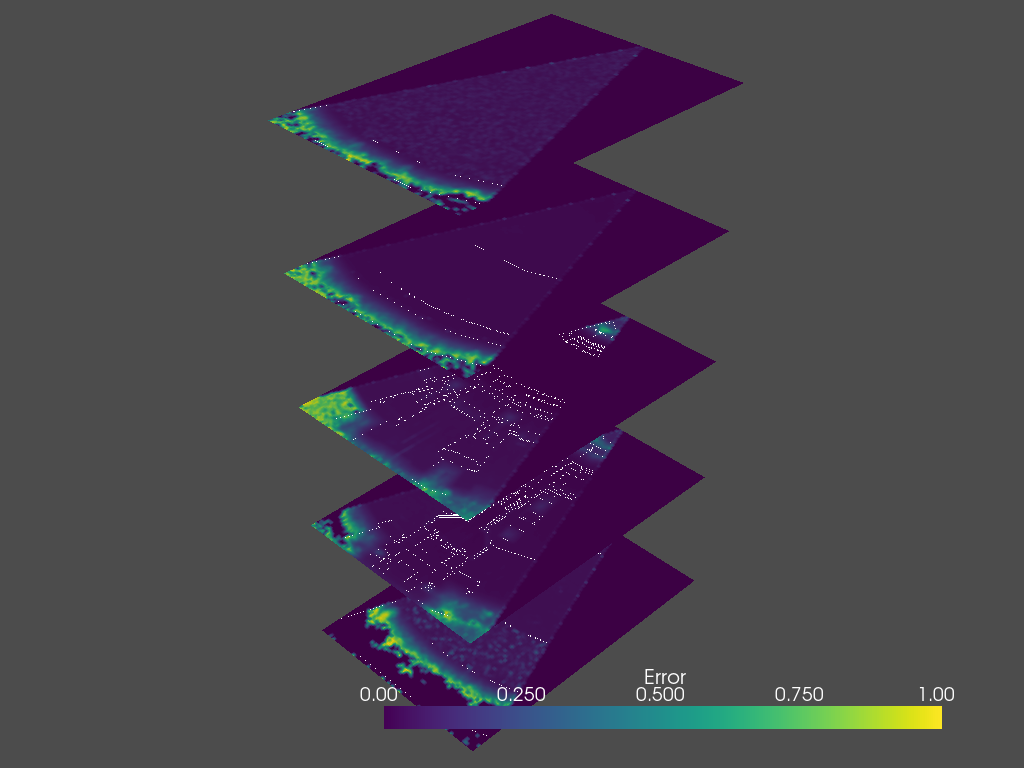

In [10]:
mesh_slices, stl_slices = atlas.slice_on_axis('z', 5)

p = pv.Plotter()
# p.add_mesh(mesh_slices[1], scalars='Error')
# p.add_mesh(mesh, opacity=0.1)
# p.add_bounding_box()
for mesh_slice, stl_slice in zip(mesh_slices, stl_slices):
    p.add_mesh(mesh_slice, scalars= 'Error')
    p.add_mesh(stl_slice)

p.show(jupyter_backend='static')

In [11]:
mesh_slice.bounds

(0.0, 1700.0, -580.0, 580.0, 1660.0, 1660.0)

In [12]:
def _set_perpendicular_camera(mesh_slice: pv.PolyData,
                                  pl: pv.Plotter) -> None:
        # align camera: focus on center, position at center + normal
        center = mesh_slice.center
        pl.camera.focal_point = center
        pl.camera.position = center + mesh_slice.cell_normals[0]
        # reset camera to put entire mesh in view

        pl.reset_camera(bounds=mesh_slice.bounds)

In [13]:
mesh_slice.point_normals


pyvista_ndarray([[ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 ...,
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.]], dtype=float32)

In [14]:
mesh_slice.cell_normals

pyvista_ndarray([[ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 ...,
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.],
                 [ 0.,  0., -1.]], dtype=float32)

In [15]:
mesh_slice.cell_normals.mean(axis=0)

pyvista_ndarray([ 0.,  0., -1.], dtype=float32)

In [16]:
mesh_slice.bounds

(0.0, 1700.0, -580.0, 580.0, 1660.0, 1660.0)

In [17]:
mesh_slice.center

[850.0, 0.0, 1660.0]

In [18]:
mesh_slice.points

pyvista_ndarray([[   0., -580., 1660.],
                 [  10., -580., 1660.],
                 [  20., -580., 1660.],
                 ...,
                 [1680.,  580., 1660.],
                 [1690.,  580., 1660.],
                 [1700.,  580., 1660.]], dtype=float32)